In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [3]:
prior = pd.read_csv("../python_ml/data/instacart/order_products__prior.csv")
products = pd.read_csv("../python_ml/data/instacart/products.csv")
orders = pd.read_csv("../python_ml/data/instacart/orders.csv")
aisles = pd.read_csv("../python_ml/data/instacart/aisles.csv")

# k-means方法聚类

In [5]:
# 合并四张表到一张表  （用户-物品类别）
#订单表和产品表关联
#用户买了哪些订单，订单里面有哪些产品，产品对应的过道，过道对应的产品类别
_mg = pd.merge(prior, products, on=['product_id', 'product_id'])
_mg = pd.merge(_mg, orders, on=['order_id', 'order_id'])
mt = pd.merge(_mg, aisles, on=['aisle_id', 'aisle_id'])
mt

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0,baking ingredients
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent,74,17,25247,prior,24,2,6,21.0,dish detergents
32434485,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter,78,19,25247,prior,24,2,6,21.0,crackers
32434486,3421083,4600,8,0,All Natural French Toast Sticks,52,1,25247,prior,24,2,6,21.0,frozen breakfast
32434487,3421083,24852,9,1,Banana,24,4,25247,prior,24,2,6,21.0,fresh fruits


In [7]:
#数据缺失率，通过isnull().sum()查看缺失率来比对缺失的数量
mt.isnull().sum()/mt.shape[0]  

order_id                  0.00000
product_id                0.00000
add_to_cart_order         0.00000
reordered                 0.00000
product_name              0.00000
aisle_id                  0.00000
department_id             0.00000
user_id                   0.00000
eval_set                  0.00000
order_number              0.00000
order_dow                 0.00000
order_hour_of_day         0.00000
days_since_prior_order    0.06407
aisle                     0.00000
dtype: float64

In [8]:
# 交叉表（特殊的分组工具），
# 生成一个类似于one-hot编码的pd，可以清晰的查看数据的情况
cross = pd.crosstab(mt['user_id'], mt['aisle'])

In [17]:
#通过pca主成分分析进行降维

pca = PCA(n_components=0.9)
data = pca.fit_transform(cross)
data.shape

(206209, 27)

开始聚类

In [18]:
km = KMeans(n_clusters=4)
km.fit(data)

predict = km.predict(data)
print(predict)  #预测得到的是每一个样本的类别

[2 0 2 ... 0 3 2]


In [19]:
import numpy as np
np.unique(predict)

array([0, 1, 2, 3], dtype=int32)

作图展示

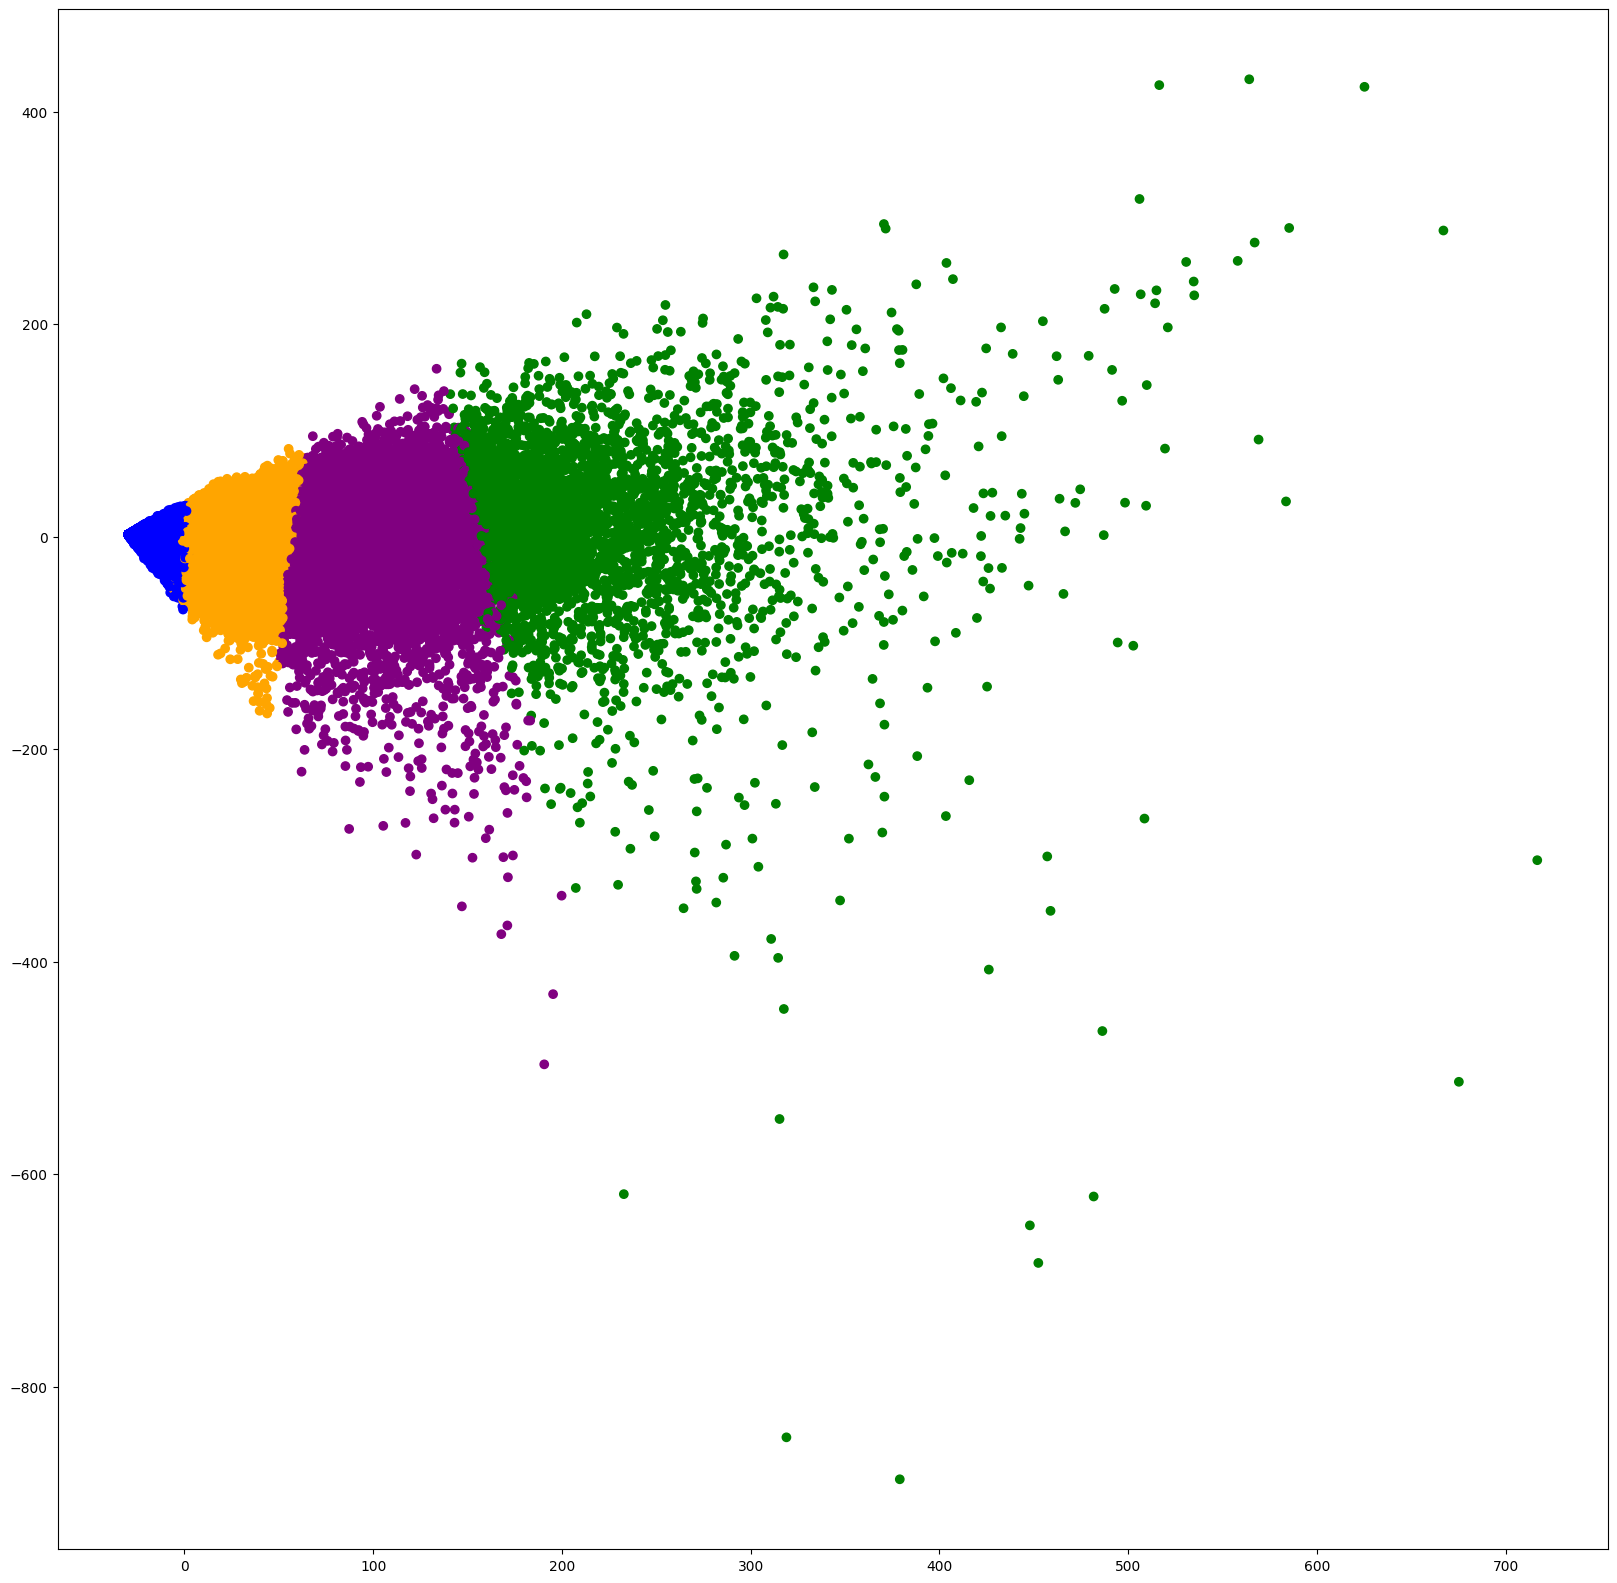

In [21]:
plt.figure(figsize=(20, 20))
# 建立四个颜色的列表
colored = ['orange', 'green', 'blue', 'purple']
colr = [colored[i] for i in predict] #根据类别给每个样本赋予颜色
#去选择任意两个特征来看聚类的图，可以自行调整,第2个，第20个特征
plt.scatter(data[:,0], data[:,1], color=colr)


评判聚类的效果

In [23]:
# 评判聚类效果，轮廓系数，聚类效果很难超过0.7，可以通过这个得分去调整上面KMeans的n_clusters
silhouette_score(data, predict)

np.float64(0.4378674924375925)

# 异常值检测办法 1.基于分位树找异常值

In [ ]:
"""
        Q1是数据的第一四分位数（25%）。
        Q3是数据的第三四分位数（75%）。
        四分位距 IQR = Q3 - Q1，用于衡量数据的分散程度
        
        下界 lower_bound = Q1 - 1.5 * IQR
        上届 upper_bound = Q3 + 1.5 * IQR
        
        通过apply()方法将每个数据点判断是否为异常值，并标记为yes or no
        最后通过df[df['outlier]] == 'yes' 获取被标记为异常值的数据行
    
        
"""

In [30]:
np.random.seed(42)  # 为了结果的可重复性设置随机种子
X = np.random.rand(50, 1)  # 2维数据
type(X)

numpy.ndarray

In [32]:
import pandas as pd

# 假设df是一个Pandas DataFrame，包含了你想要分析的数据集
# 'column_name'是你想要检测异常值的列名

#随机一个dataframe
df=pd.DataFrame(X,columns=['column_name'])
Q1 = df['column_name'].quantile(0.25)  # 第一四分位数（25%）
Q3 = df['column_name'].quantile(0.75)  # 第三四分位数（75%）
# 计算四分位数范围（IQR）
IQR = Q3 - Q1

# 定义下界和上界来识别异常值
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# 标记异常值
df['outlier'] = df['column_name'].apply(lambda x: 'Yes' if x < lower_bound or x > upper_bound else 'No')

# 打印出被标记为异常值的行
df[df['outlier'] == 'Yes']

,column_name,outlier


# 3.基于DBSCAN算法找异常值

### 初始化

(1600, 2)


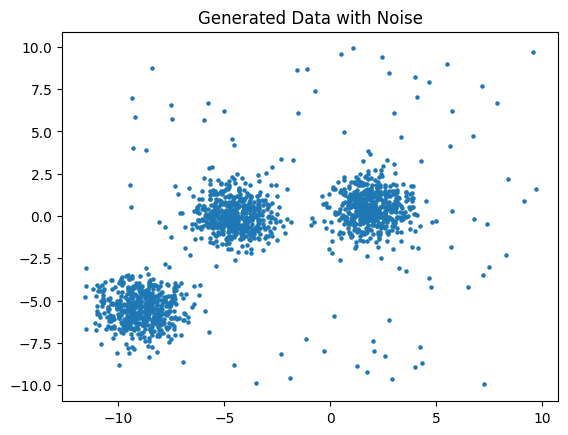

In [33]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# 生成样本数据
n_samples = 1500
random_state = 170
# make_blobs 生成聚类数据集 ，默认是三个簇，分别聚集在(0,0),(5,5),(-5,-5)附近，并且标准差为1
# X 是数据点，Y是 这些数据点的标签
X, y = make_blobs(n_samples=n_samples, random_state=random_state) #y没有用
X
# 增加一些噪声点，往X中拼接噪声点
rng = np.random.RandomState(74)
X = np.concatenate([X, rng.uniform(low=-10, high=10, size=(100, 2))])
print(X.shape) #1600个样本，2列特征，100个噪声点

# 可视化生成的数据
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.title("Generated Data with Noise")
plt.show()

### 聚类

[-1  0  1  2]
131
[0 1 2]


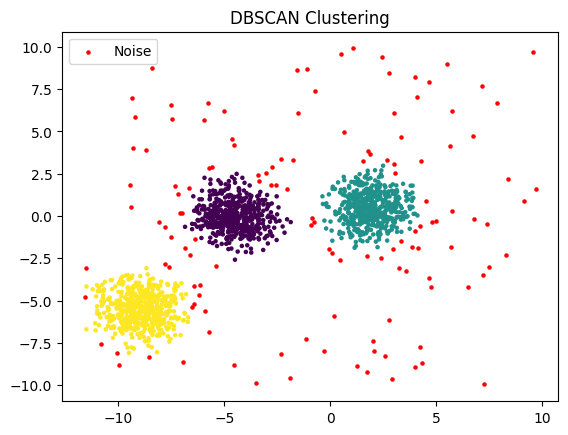

In [34]:
# 使用DBSCAN算法
db = DBSCAN(eps=0.5, min_samples=5).fit(X) # eps是半径，min_samples是最少包含几个点才会被认为是核心点
labels = db.labels_ # 得到每个点的类别
print(np.unique(labels)) # 得到类别有-1 0 1 2 总计4个类别
# 标签为-1的点是噪声点
noise_mask = (labels == -1)
print(np.sum(noise_mask)) # 噪声点的数量
print(np.unique(labels[~noise_mask])) # 得到噪声点的mask
# 可视化聚类结果
plt.scatter(X[~noise_mask, 0], X[~noise_mask, 1], c=labels[~noise_mask], s=5, cmap='viridis') # 正常点用彩色标注
plt.scatter(X[noise_mask, 0], X[noise_mask, 1], c='red', s=5, label='Noise') # 噪声点用红色标注
plt.title("DBSCAN Clustering")
plt.legend()
plt.show()


# 孤立森林

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1 -1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1]


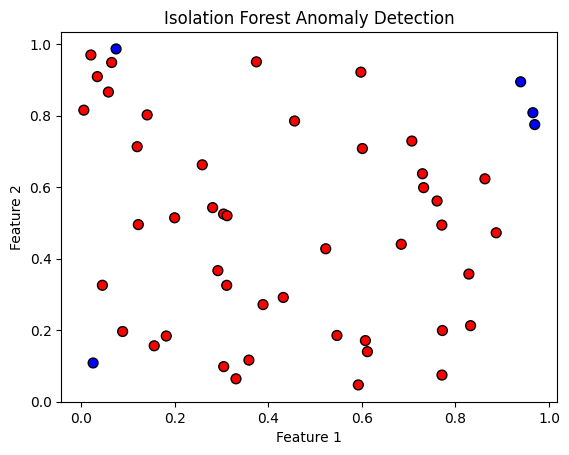

In [35]:
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# 随机生成50个数据点
np.random.seed(42)  # 为了结果的可重复性设置随机种子
X = np.random.rand(50, 2)  # 2维数据,2列好画图来解释

# 初始化Isolation Forest模型，contamination参数表示异常值比例，默认0.1
iso_forest = IsolationForest(random_state=42, contamination=0.1)

# 训练模型，随机建树的过程
iso_forest.fit(X)

# 预测每个点的异常分数，在树中的高度越低，越可能是异常点
scores = iso_forest.decision_function(X)

# print(scores)
# 将异常分数转换为1（正常）和-1（异常）的标签
labels = iso_forest.predict(X)
print(labels)
# 绘制数据点和异常点
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.bwr, edgecolor='k', s=50)
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()